# Entropy

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets

:::{figure-md} markdown-fig

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Entropy_flip_2_coins.jpg" alt="Information" style="width:10%">

Introducing entropy
:::

### Large deviation theory, entropy and free energy.

- Consider a 1D random walk again. Let us write down probability of a random walk taking $n$ steps to right and $n_2$ steps to left given that the probabilities are $\theta$ probability to move to right and $\theta_2$ to move to left respectively. By definition $N=n_1+n_2$ and $\theta_1+\theta_2=1$. Probability of this random walk could represent polymer conformations or diffusing molecules. 

$$P_N (n_1 | \theta_1) = \frac{N!}{n_1! n_2!} \cdot \theta_1^{n_1} \theta_2^{n_2}$$

- We already know that in the limit of large N the distribution of sum of random variables becomes gaussian. But before N becomes too large and probability distribution converges to gaussian there is an intermediate regime where fluctuations are dominant and where a non-gaussian function controls the shape of the distribution. To see this we take the log and using Stirling approximation $log N! = NlogN-N$  and using $n=n_1$ and $p=p_1$ as independent variables we get:

$$ log P_N (n|\theta) = N \Big[ -\frac{n_1}{N} log \frac{n_1}{N} -\frac{n_2}{N} log \frac{n_2}{N}  + \frac{n_1}{N} log(\theta_1) + \frac{n_2}{N} log \theta_2 \Big]$$ 

$$ log P_N (p|\theta) = N \Big[ -p_1 log p_1 -p_2 log p_2  + p_1 log(\theta_1) + p_2 log \theta_2 \Big]$$ 

$$ log P_N (p|\theta) = N [ s  + \epsilon ] = N I(p, \theta)$$ 

$$P_N \sim e^{-N I(p, \theta)}$$

- We find that probability to deviate from mean values decays exponentially with a decay function specific to a system and independent of N. The $F(n)$ **a free energy per particle**. Mathematicians call it large deviation function. 
- The expression involving fractions or observable probabilities of steps of moving to right and left; $p_1=n_1/N$ and $p_2=n_2/N$ is called **Entropy**. 
- The terms involving bias of a random walk $\theta$ can be identified with **Energy** since it has the effect of tilting the random towards left or right.

$$s(n) = -p_1 log p_1 - p_2 log p_2  = -\sum_i p_i log p_i = -\langle log p \rangle$$

$$\epsilon(n) = p_1 log \theta_1 - p_2 log \theta_2  = \sum_i p_i log \theta_i =  \langle log \theta \rangle$$

In [104]:
@widgets.interact(theta=(0.01,0.99), N=(1,1000))
def large_dev(theta, N):

  fmin, fmax, step=0, 1, 0.01
    
  f = np.arange(fmin+step, fmax-step, step)
    
  I = - f * np.log(theta) - (1-f)*np.log(1-theta) + f * np.log(f) + (1-f)*np.log(1-f)

  plt.plot(f, I, linewidth=2.5, label=r'$I(p, \theta)$')
  plt.plot(f, np.exp(-N*I), label=r'$e^{-NI(p, \theta)}$' )

  plt.xlabel(r'$p$')
  plt.ylabel(r'$I(p)$')
  plt.legend()
  plt.show()

interactive(children=(FloatSlider(value=0.5, description='theta', max=0.99, min=0.01), IntSlider(value=500, de…

In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

def plot_large_deviation(N, theta, color):
  
    fmin, fmax, step=0, 1, 0.01
    
    f = np.arange(fmin+step, fmax-step, step)
    
    I = -f * np.log(theta) - (1-f)*np.log(1-theta) + f * np.log(f) + (1-f)*np.log(1-f)
    
    p_ldt = np.exp(-N * I) / (np.sum(np.exp(-N * I))*step) # normalized probability
    
    plt.plot(f, p_ldt, color=colors[i], label=f'LDF N={N}', linewidth=2)

def plot_binomial(N, theta, color):

    n = np.arange(N+1)
    f = n / N
    
    prob = comb(N, n) * theta**n * (1-theta)**(N-n)
    plt.plot(f, prob * N, 'o', color=color, label=f'Binomial N={N}')

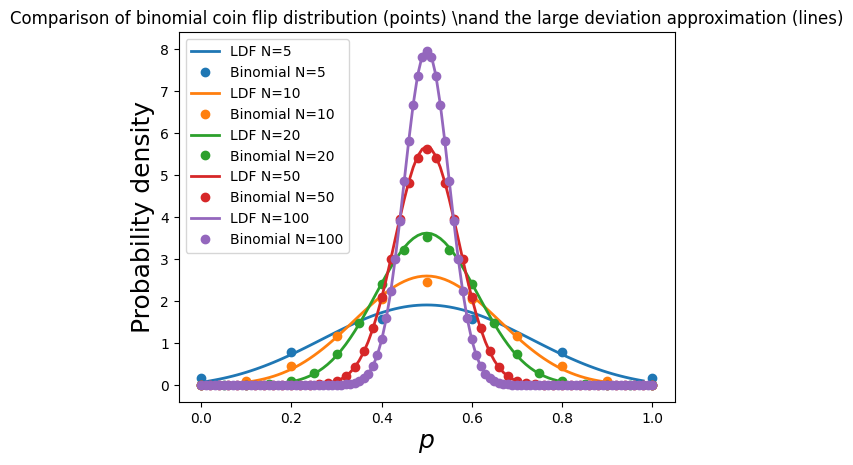

In [106]:
# Parameters
theta = 0.5
Ns = [5, 10, 20, 50, 100]

# Use default colors from the current color cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for i, N in enumerate(Ns):
    plot_large_deviation(N, theta, colors[i])
    plot_binomial(N, theta, colors[i])

plt.xlabel(r'$p$', fontsize=18)
plt.ylabel(r'Probability density', fontsize=18)
plt.title(r'Comparison of binomial coin flip distribution (points) \nand the large deviation approximation (lines)', fontsize=12)
plt.legend(loc="upper left")
plt.show()

In [81]:
fair_die_prob = 1/6*np.ones(6)

fair_die_prob


array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

### Entropy and Information

**Which of these two statements conveys the most information?**

- I will eat some food tomorrow.
- I will see a giraffe walking by my apartment. 

**A measure of information (whatever it may be) is closely related to the element of... surprise!**

- has very high probability and so conveys little information,
- has very low probability and so conveys much information. 

> If we quanitfy suprise we will quantify information

**Knowledge leads to gaining information**

Which is more surprising (contains more information)?

- E1: The card is heart?

- E2:The card is Queen?

- E3: The card is Queen of hearts?

- $P(E_1) = \frac{1}{4}$


- $P(E_2)  =  \frac{4}{52} = \frac{1}{13}$


- $P(E_1 \, and\,  E_2) = \frac{1}{52}$ 

1. We learn the card is heart $I(E_1)$

2. We learn the card is Queen $I(E_2)$

3. $I(E_1 and E_2) = I(E_1) + I(E_2)$

4. Knowledge of event can add to information: $I(E) \geq 0$

### A logarithm of probability is a good candidate function for information!

Because information should be additive!

$$log P(E_1) P(E_2) = log P(E_1) + log(E_2)$$

### Why bit (base two)

Consider symmetric a 1D random walk with equal jump probabilities. We can view **Random walk = string of Yes/No questions**

- to decode a single step we need one bit

$$I(X=0) = I(X=1) = -log_2 \frac{1}{2} = 1$$

- to decode N step trajectory we need N bits. 

$$(x_0,x_1,...x_N) = 10111101001010100100$$

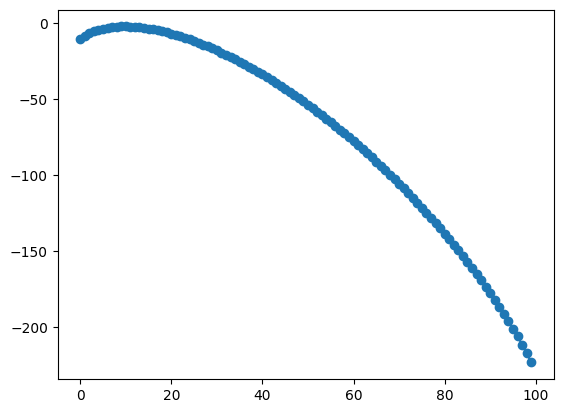

In [61]:
from scipy.stats import binom

N = 100 #trials
p = 0.01 # probability of sucess

W_bin = [binom.pmf(n, N, p=0.1) for n in range(N)] 

plt.plot(np.arange(N),np.log(W_bin), '-o')

**How many yes or no on average to reconstruct random walk?**

$$H(X) = \langle -log p(X) \rangle$$

**Shannon  Measure of Information (SMI)**

$$H = -\sum_i p_i log p_i$$

**Surprise**

$$I_i = -log p_i$$

> Information is an average of surprise.!!! How surprised are you on average? 

Information per letter $I(m)$ to decode the message

- $m:$ Letters in the alphabet (Russian: 33,Enlgish: 26,  Korean: 24) 


- $I(Russian) > I(English) > I(Korean)$


- $I(m_1, m_2) = I(m_1) + I(m_2)$ reagrdless of the order letters are sent!


> One bit is an amount of information one can obtain from the answer to a single yes–no question. The number of bits to decode a message grows witht the lengt of an alphabet and length of the word. 

### Alphabets are not random! hghjxcjxcc

Some letters happen more often than the others! Probability of each letter in an independent sequence is $p_m = \frac{1}{m}$

$$\boxed{H(p) = - \sum_m p_m log_m p_m}$$

> We must send a message explaining how to combine the transferred symbols as a part of the message, but the length of the needed message is finite and independent of the length of the actual message we wish to send, so in the long message limit we may ignore this overhead.

### Shanon Measure of Information

$$\boxed{H = -\sum_i p_i log p_i}$$

> **[To Shanon], You should call it Entropy, for two reasons. 
In the first place you uncertainty function has been used in statistical mechanics under that name. 
In the second place, and more importantly, no one knows what entropy really is, so in a debate you will always have the advantage.” J von Neumann**

### Quantifying information

- How much knowledge we need to find out outcome of fair dice?

- We are told die shows a digit higher than 2 (3, 4, 5 or 6). How much knowledge does this information carry? 

 - $H(E_1) = log_2 6$
 
 
 - $H(E_1) - H(E_2) = log_2 6 - log_2 4$

### Information per Letter of English

If the symbols of English alphabet (+ blank) appear equally probably, what is the information carried by a single symbol? This must be $log_2(26 + 1) = 4.755$ bits, but for actual English sentences, it is known to be about **$1.3$ bits. Why?**

### Two kittens

There are two kittens. We are told that at least one of them is a male. What is the information we get from this message?

$$E_1 = \{mm,mf,fm, ff \} $$

$$E_2 = \{mm,mf,fm\}$$

$$H(E_1) -H(E_2) = log_2 4 -log_2 3 = 0.41$$

### Game of message decoding:

Given some 70 letters decode a 250 letter paragraph!

$$\frac{70}{250}log_2 27 = 1.3$$

> Cover T. M. and King, R. C. (1978). "A convergent gambling estimate of the entropy of English" IEEE Trans. Info. Theory, 24, 413–421

### Monty Hall problem

There are five boxes, of which one contains a prize. A game participant is asked to choose one box. After they choose one of the five boxes, the “coordinator” of the game identifies as empty three of the four unchosen boxes. What is the information of this message? 

- $H(E_1) = log_2 5 = 2.322$


- $H(E_2) = -\frac{1}{5} log_2 5 - \frac{4}{5} log_2 \frac{4}{5} = 0.722$

- $H(E_1)-H(E_2) = 1.6$

### Non integer number of YES/NO questions??

We have encountered a fraction of bit of information several times now. What does it imply in terms of number of YES/NO questions. That is becasue in some cases single YES/NO question can rule out more than one elementary event.

> 999 blue balls and 1 red ball. how many questions we need to ask to determin the colors of all balls? $S = 9.97$ bit or 0.01 bit per ball. Divide the container by 500 and 500 and ask where the red ball is? 1 questions rules out 500 balls at once. 

### Is information physical?

**Wheeler's It from bit.**

> Every it — every particle, every field of force, even the space-time continuum itself — derives its function, its meaning, its very existence entirely — even if in some contexts indirectly — from the apparatus-elicited answers to yes-or-no questions, binary choices, bits. It from bit symbolizes the idea that every item of the physical world has at bottom — a very deep bottom, in most instances — an immaterial source and explanation; that which we call reality arises in the last analysis from the posing of yes-no questions and the registering of equipment-evoked responses; in short, that **all things physical are information-theoretic in origin**" John Weeler

### Jayne's MaxEnt (Maximum Entropy principle)

Probability is an expression of incomplete information. Given that we have some
information, how should we construct a probability distribution that reflects that
knowledge, but is otherwise unbiased? The best general procedure, known as Jaynes
Maximum Entropy Principle , is to choose the probabilities $p_k$ to maximize the Shanon Measure of Information of the distribution, subject to constraints that express what we do know

**Fair die example**

$$J[p_1, p_2, ..] = - \sum p_i log p_i - \lambda \sum_i p_i$$

$$p_1  = p_2 = ... =  p_N $$

**biased die**

We are given infromation that on average rolling a die yields $\langle x \rangle = 5.5$


$$J[p_1, p_2, ..] = - \sum p_i log p_i - \lambda \sum_i p_i - B \sum_i p_i x_i $$

$$p_i \sim e^{-B x_i}$$

### Problems

- Compute entropy of gaussian distribution. Plot entropy as a function of variance

- Using MaxEnt approach find probability distribution with mean and variance equal to $\mu$ and $\sigma^2$ respectively. 

- Simulate 1D random walk and compute entropy by first computing probability distribution $p_N(n)$